In [775]:
import pandas as pd
import numpy as np
import seaborn as sns
#plt.style.use('seaborn')
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [776]:
BostMar_df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/results.txt',encoding = "ISO-8859-1",error_bad_lines=False)
pd.set_option('display.max_columns', 50)

In [777]:
BostMar_df.head()

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
0,4 / 26,"Soejima, Masazumi",Fukuoka City,M,41,83.45,W1,4 / 35,NaN,4 / 26,83.45,JPN
1,14 / 4335,"Gebremariam, Gebregziabher",Tigray,M,27,142.93,2,14 / 21616,NaN,14 / 12621,142.93,ETH
2,6 / 26,"Van Dyk, Ernst F.",Paarl,M,39,84.38,W2,6 / 35,NaN,6 / 26,84.38,RSA
3,2 / 26,"Fearnley, Kurt H.",Hamilton,M,31,81.65,W3,2 / 35,NaN,2 / 26,81.65,AUS
4,3 / 26,"Hokinoue, Kota",Iizuka,M,38,83.43,W4,3 / 35,NaN,3 / 26,83.43,JPN


In [779]:
BostMar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 12 columns):
division     21576 non-null object
name         21576 non-null object
city         21576 non-null object
gender       21576 non-null object
age          21576 non-null int64
official     21576 non-null object
bib          21576 non-null object
overall      21576 non-null object
state        19808 non-null object
genderdiv    21576 non-null object
net          21576 non-null float64
country      21576 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 2.0+ MB


In [ ]:
BostMar_df.drop(list(np.where(BostMar_df.official=='-')[0]),0,inplace=True)
BostMar_df.index = range(len(BostMar_df))

In [780]:
BostMar_df['official'] = BostMar_df.official.astype(float)

In [827]:
men_df = BostMar_df[(~BostMar_df.bib.str.contains('W')) & (~BostMar_df.bib.str.contains('F'))&(BostMar_df.gender=='M')]
women_df = BostMar_df[(~BostMar_df.bib.str.contains('W'))&( ~BostMar_df.bib.str.contains('F'))&(BostMar_df.gender=='F')]

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
440,37 / 4599,"Lickteig, Kaci",Omaha,F,25,186.72,563,777 / 21616,NE,47 / 8995,185.70,USA
460,18 / 4599,"Pishny, Elle",Boston,F,26,180.23,593,525 / 21616,MA,26 / 8995,179.87,USA
771,4 / 807,"Samuelson, Joan B.",Freeport,F,54,208.22,989,2813 / 21616,ME,339 / 8995,208.13,USA
772,39 / 4599,"Kelly, Mary",Broomall,F,24,186.73,990,812 / 21616,PA,49 / 8995,186.32,USA
773,1757 / 4599,"Hansen, Anna",Austin,F,30,241.33,991,8836 / 21616,TX,2537 / 8995,240.92,USA
920,22 / 4599,"Fowler, Kimberlie E.",Raleigh,F,31,181.67,1201,576 / 21616,NC,31 / 8995,181.03,USA
1023,21 / 4599,"Lieberg, Heather M.",Helena,F,32,181.87,1346,572 / 21616,MT,30 / 8995,181.00,USA
1035,15 / 4599,"Lambert, Meredith",Ardmore,F,28,177.40,1363,400 / 21616,PA,20 / 8995,176.70,USA
1044,29 / 4599,"Peterson, Christy",Doylestown,F,37,183.60,1373,650 / 21616,PA,39 / 8995,182.83,USA
1067,20 / 4599,"Malgeri, Megan P",Burlington,F,31,180.58,1409,528 / 21616,VT,28 / 8995,179.93,USA


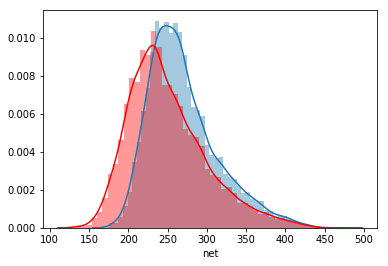

In [828]:
sns.distplot(women_df.net ) 
sns.distplot(men_df.net,color='r' )
 

In [677]:
BostMar_df['divisions'] = BostMar_df.division.str.replace(" ", "").str.split('/') 

In [800]:
other_df

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
6,1 / 4599,"Cherop, Sharon",Marakwet,F,28,151.83,F4,28 / 21616,NaN,1 / 8995,151.83,KEN
10,4 / 4599,"Dado, Firehiwot",Assela,F,28,154.93,F6,44 / 21616,NaN,4 / 8995,154.93,ETH
13,6 / 4599,"Jeptoo, Rita",Eldoret,F,31,155.88,F8,51 / 21616,NaN,6 / 8995,155.88,KEN
21,3 / 4599,"Rono, Georgina",Kapsabet,F,31,153.15,F11,32 / 21616,NaN,3 / 8995,153.15,KEN
24,9 / 4599,"Getaneh, Genet",Arsi,F,26,162.18,F14,101 / 21616,NaN,11 / 8995,162.18,ETH
27,5 / 4599,"Sigei, Diana",Eldoret,F,24,155.67,F15,47 / 21616,NaN,5 / 8995,155.67,KEN
30,2 / 4599,"Sumgong, Jemima Jelagat",Nandi,F,27,151.87,F16,29 / 21616,NaN,2 / 8995,151.87,KEN
32,8 / 4599,"Leonteva, Nadezdha",Samara,F,27,160.67,F17,87 / 21616,NaN,8 / 8995,160.67,RUS
37,7 / 4599,"Fujita, Mayumi",Osaka,F,28,159.18,F20,75 / 21616,NaN,7 / 8995,159.18,JPN
41,70 / 4599,"Akor, Mary A.",Hawthorne,F,35,194.17,F22,1291 / 21616,CA,87 / 8995,194.17,USA


In [678]:
BostMar_df['division2'] = BostMar_df.divisions.apply(lambda x : x[1])

In [446]:
cntry_label = pd.DataFrame(BostMar_df.country.unique())
cntry_label = dict(zip(cntry_label[0].astype(str), cntry_label.index))
BostMar_df['cntry_label'] = BostMar_df.country.map(cntry_label)
 

In [750]:
BostMar_df.country.unique()

array(['JPN', 'ETH', 'RSA', 'AUS', 'KEN', 'CAN', 'USA', 'SUI', 'RUS',
       'ESP', 'NED', 'GBR', 'FRA', 'BRA', 'ITA', 'DEN', 'HUN', 'MEX',
       'CRC', 'GRE', 'IRL', 'GUA', 'COL', 'NOR', 'SWE', 'VEN', 'SLO',
       'GER', 'KOR', 'AUT', 'POR', 'HKG', 'UAE', 'BAH', 'IND', 'ISL',
       'ARG', 'BEL', 'CHI', 'NZL', 'POL', 'SIN', 'CHN', 'CZE', 'CAY',
       'MLT', 'FIN', 'MAS', 'PER', 'ISR', 'EST', 'URU', 'ECU', 'LUX',
       'PHI', 'SVK', 'DOM', 'NGR', 'BER', 'CRO'], dtype=object)

In [854]:
BostMar_df['sex'] = np.where(BostMar_df.gender=='M',1,0)

In [744]:
BostMar_df.head(100)

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country,divisions,divs,sex,percentage_of_division,cntry_label,country_rank,division2,div2
0,4 / 26,"Soejima, Masazumi",Fukuoka City,M,41,83.45,W1,4 / 35,NaN,4 / 26,83.45,JPN,"[4, 26]",6,1,0.846154,0,49.0,26,26
1,14 / 4335,"Gebremariam, Gebregziabher",Tigray,M,27,142.93,2,14 / 21616,NaN,14 / 12621,142.93,ETH,"[14, 4335]",21,1,0.996770,1,2.0,4335,4335
2,6 / 26,"Van Dyk, Ernst F.",Paarl,M,39,84.38,W2,6 / 35,NaN,6 / 26,84.38,RSA,"[6, 26]",6,1,0.769231,2,32.0,26,26
3,2 / 26,"Fearnley, Kurt H.",Hamilton,M,31,81.65,W3,2 / 35,NaN,2 / 26,81.65,AUS,"[2, 26]",6,1,0.923077,3,24.0,26,26
4,3 / 26,"Hokinoue, Kota",Iizuka,M,38,83.43,W4,3 / 35,NaN,3 / 26,83.43,JPN,"[3, 26]",6,1,0.884615,0,49.0,26,26
5,2 / 4335,"Matebo, Levy",Trans Nzoia,M,22,133.10,4,2 / 21616,NaN,2 / 12621,133.10,KEN,"[2, 4335]",21,1,0.999539,4,1.0,4335,4335
6,1 / 4599,"Cherop, Sharon",Marakwet,F,28,151.83,F4,28 / 21616,NaN,1 / 8995,151.83,KEN,"[1, 4599]",22,0,0.999783,4,1.0,4599,4599
7,5 / 4335,"Chebet, Wilson",Marakwet,M,26,134.93,5,5 / 21616,NaN,5 / 12621,134.93,KEN,"[5, 4335]",21,1,0.998847,4,1.0,4335,4335
8,1 / 26,"Cassidy, Joshua R.",Toronto,M,27,78.42,W5,1 / 35,ON,1 / 26,78.42,CAN,"[1, 26]",6,1,0.961538,5,33.0,26,26
9,5 / 26,"Schabort, Krige",Cedartown,M,48,83.73,W6,5 / 35,GA,5 / 26,83.73,USA,"[5, 26]",6,1,0.807692,6,50.0,26,26


In [537]:
BostMar_df['country_rank'] = BostMar_df.country.map(dict(BostMar_df.groupby('country').net.mean().rank()))

In [256]:
div_df = pd.DataFrame(BostMar_df.divisions.value_counts())
div_df['act_divs'] = div_df.index 
div_df['act_divs'] = div_df.act_divs.astype(int)
div_df = div_df.sort_values(by='act_divs')
div_df.drop('divisions',1,inplace=True)
div_df.index = range(len(div_df))
 

In [694]:
BostMar_df['div2']=BostMar_df.division2.astype(int)

In [249]:
divisions_dict = dict(zip(div_df.act_divs.astype(str), div_df.index))
BostMar_df['divs'] = BostMar_df.divisions.map(divisions_dict)

In [250]:
BostMar_df.divs.unique()

array([ 6, 21, 22, 19, 20,  3, 17, 16, 13, 18, 15, 14, 12, 11,  9, 10,  7,
        8,  4,  1,  2,  0,  5], dtype=int64)

In [259]:
BostMar_df[BostMar_df.gender=='M'].divs.unique()

array([ 6, 21, 19, 20, 13, 18, 15, 11,  9,  7,  1,  5], dtype=int64)

In [260]:
BostMar_df[BostMar_df.gender=='F'].divs.unique()

array([22,  3, 17, 16, 14, 12, 10,  8,  4,  2,  0], dtype=int64)

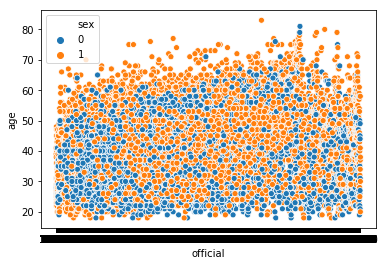

In [763]:
sns.scatterplot(BostMar_df.official,BostMar_df.age, hue=BostMar_df.sex)

In [276]:
BostMar_df['sex'] = np.where(BostMar_df.gender=='M',1,0)

In [887]:
BM_df = BostMar_df[['age','net','sex','official']]
X = BM_df[[ 'net','official']]
Y = BM_df.sex

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state=20)

In [888]:
X_train = normalize(X_train)
X_test = normalize(X_test)
X_pca = PCA(2).fit_transform(X_test) 

K_means with k = 2


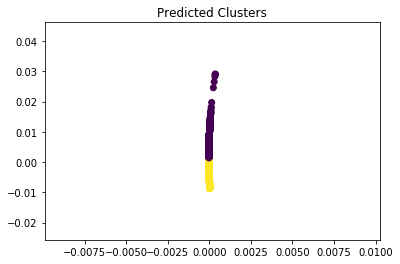

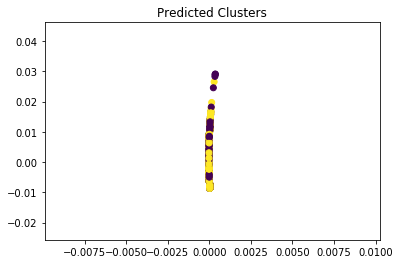

Comparing k-means clusters against the data:
col_0    0     1
sex             
0      863   929
1      978  1546



In [868]:
from sklearn.cluster import KMeans

# Calculate predicted values for K-means
print("K_means with k =",2) 
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_test)

# Plot the solution.
plt.scatter(X_pca[:,1], X_pca[:,0], c=y_pred)
plt.title('Predicted Clusters')
plt.show()
 
plt.scatter(X_pca[:,1], X_pca[:,0],c=y_test)
plt.title('Predicted Clusters')
plt.show()


# Binarize y_pred to match y
#y_pred = np.where(y_pred > 0, 0, 1)
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_test,y_pred))     
print()
 

In [869]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.48      0.48      1792
           1       0.62      0.61      0.62      2524

    accuracy                           0.56      4316
   macro avg       0.55      0.55      0.55      4316
weighted avg       0.56      0.56      0.56      4316



In [870]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X_train)
y_pred = gmm.predict(X_test)

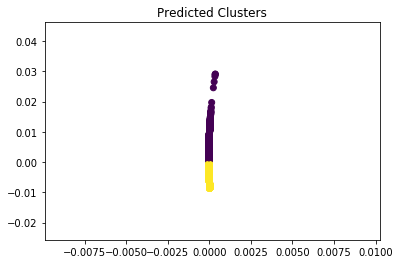

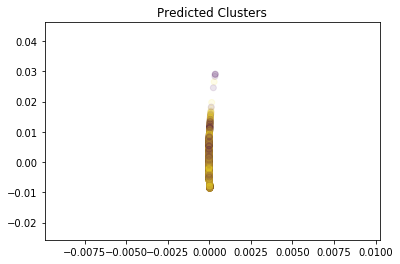

In [874]:
# Plot the solution.
plt.scatter(X_pca[:,1], X_pca[:,0], c=y_pred)
plt.title('Predicted Clusters')
plt.show()
 
plt.scatter(X_pca[:,1], X_pca[:,0],c=y_test,alpha=.1)
plt.title('Predicted Clusters')
plt.show()


In [872]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1792
           1       0.63      0.59      0.61      2524

    accuracy                           0.56      4316
   macro avg       0.55      0.55      0.55      4316
weighted avg       0.57      0.56      0.56      4316



In [873]:
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_test,y_pred))     
print()
 

Comparing k-means clusters against the data:
col_0     0     1
sex              
0       932   860
1      1047  1477



Number of estimated clusters: 1


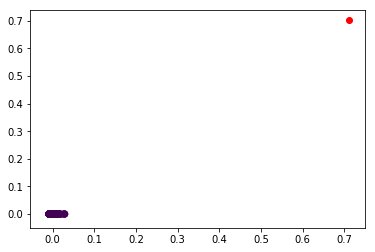

Comparing the assigned categories to the ones in the data:
col_0     0
sex        
0      1792
1      2524


In [882]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_test, quantile=.7, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_test)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.scatter(y=pd.DataFrame(cluster_centers)[0],x=pd.DataFrame(cluster_centers)[1],color='r')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,labels))

In [883]:
print(classification_report(y_test,labels))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59      1792
           1       0.00      0.00      0.00      2524

    accuracy                           0.42      4316
   macro avg       0.21      0.50      0.29      4316
weighted avg       0.17      0.42      0.24      4316



C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [523]:
xx = pd.DataFrame(X_train).sample(frac=.01)
xx = normalize(xx)

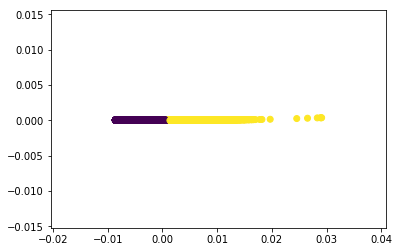

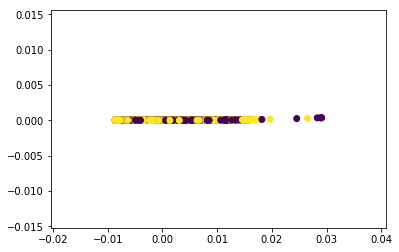

In [889]:
from sklearn.cluster import SpectralClustering

# We know we're looking for four clusters.
n_clusters=2
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_test)

#Predicted clusters.
predict=sc.fit_predict(X_test)
 
#Graph results.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict)
plt.show()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test)
plt.show()
#print('Comparing the assigned categories to the ones in the data:')
#print(pd.crosstab(y_test,predict))

In [890]:
print(pd.crosstab(y_test,predict))

col_0     0    1
sex             
0       929  863
1      1546  978


In [885]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.38      0.52      0.44      1792
           1       0.53      0.39      0.45      2524

    accuracy                           0.44      4316
   macro avg       0.45      0.45      0.44      4316
weighted avg       0.47      0.44      0.44      4316



In [891]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.silhouette_score(X_test, predict, metric='euclidean'))

0.6229597481690434


In [529]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.silhouette_score(X_test, predict, metric='euclidean'))

0.41102009709585524


In [493]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.57      0.62      0.60      1815
           1       0.71      0.67      0.69      2516

    accuracy                           0.65      4331
   macro avg       0.64      0.64      0.64      4331
weighted avg       0.65      0.65      0.65      4331



0.9550546380639087

In [604]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_test)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 220


In [501]:
pred = af.predict(X_test)

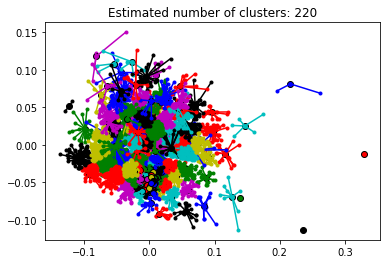

In [607]:


from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_pca[cluster_centers_indices[k]]
    plt.plot(X_pca[class_members, 0], X_pca[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_pca[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [502]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    1815.0
           1       0.00      0.00      0.00    2516.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       0.0
          17       0.00    

C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
